In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [96]:
df =pd.read_csv("Weather Training Data.csv")
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [97]:
df.shape

(99516, 23)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [99]:
print (df.isnull().sum())

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64


In [100]:
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [101]:
weather= df 
weather= weather.drop(['row ID'],axis= 1)
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [102]:

weather['MinTemp']=weather['MinTemp'].fillna(weather['MinTemp'].mean())
weather['MaxTemp']=weather['MaxTemp'].fillna(weather['MaxTemp'].mean())
weather['Rainfall']=weather['Rainfall'].fillna(weather['Rainfall'].mean())
weather['Evaporation']=weather['Evaporation'].fillna(weather['Evaporation'].mean())

weather['WindGustSpeed']=weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean())

weather['Humidity9am']=weather['Humidity9am'].fillna(weather['Humidity9am'].mean())
weather['Humidity3pm']=weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean())
weather['Pressure9am']=weather['Pressure9am'].fillna(weather['Pressure9am'].mean())
weather['Pressure3pm']=weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean())
weather['Cloud9am']=weather['Cloud9am'].fillna(weather['Cloud9am'].mean())
weather['Cloud3pm']=weather['Cloud3pm'].fillna(weather['Cloud3pm'].mean())
weather['Temp9am']=weather['Temp9am'].fillna(weather['Temp9am'].mean())
weather['Temp3pm']=weather['Temp3pm'].fillna(weather['Temp3pm'].mean())


In [103]:
weather['WindGustDir']=weather['WindGustDir'].fillna(weather['WindGustDir'].value_counts().idxmax())
weather['WindDir9am']=weather['WindDir9am'].fillna(weather['WindDir9am'].value_counts().idxmax())
weather['WindSpeed3pm']=weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].value_counts().idxmax())
weather['RainToday']=weather['RainToday'].fillna(weather['RainToday'].value_counts().idxmax())
weather['WindDir3pm']=weather['WindDir3pm'].fillna(weather['WindDir3pm'].value_counts().idxmax())
weather['WindSpeed9am']=weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].value_counts().idxmax())
weather['Sunshine']=weather['Sunshine'].fillna(weather['Sunshine'].value_counts().idxmax())

In [104]:
print (weather.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [105]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99516 non-null  float64
 2   MaxTemp        99516 non-null  float64
 3   Rainfall       99516 non-null  float64
 4   Evaporation    99516 non-null  float64
 5   Sunshine       99516 non-null  float64
 6   WindGustDir    99516 non-null  object 
 7   WindGustSpeed  99516 non-null  float64
 8   WindDir9am     99516 non-null  object 
 9   WindDir3pm     99516 non-null  object 
 10  WindSpeed9am   99516 non-null  float64
 11  WindSpeed3pm   99516 non-null  float64
 12  Humidity9am    99516 non-null  float64
 13  Humidity3pm    99516 non-null  float64
 14  Pressure9am    99516 non-null  float64
 15  Pressure3pm    99516 non-null  float64
 16  Cloud9am       99516 non-null  float64
 17  Cloud3pm       99516 non-null  float64
 18  Temp9a

## visualize 

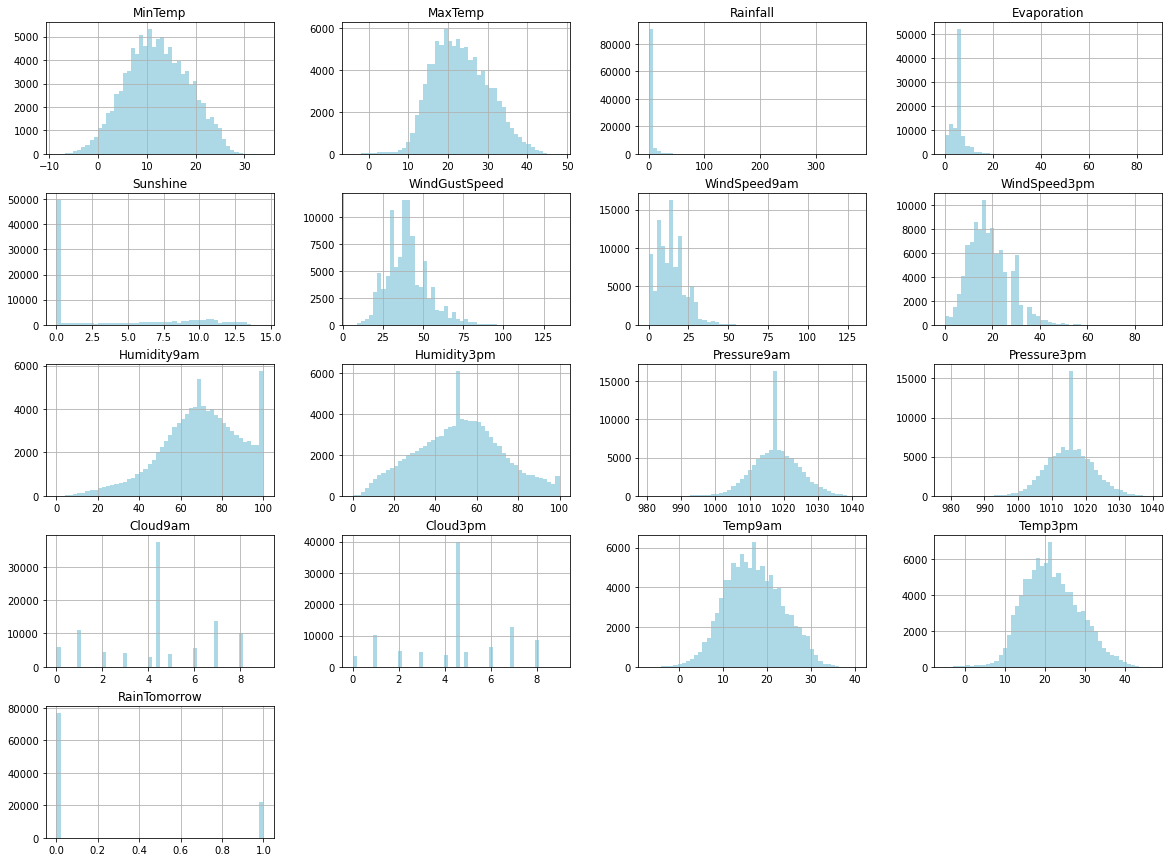

In [106]:
weather.hist(bins=50, figsize=(20,15),color= 'lightblue')
plt.show()

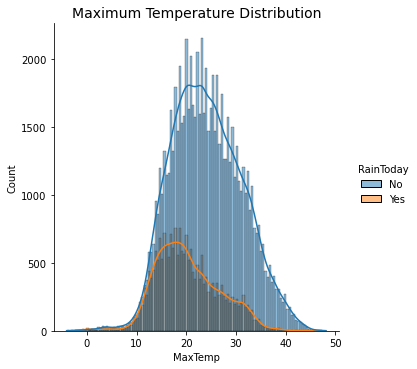

In [107]:
sns.displot(weather, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

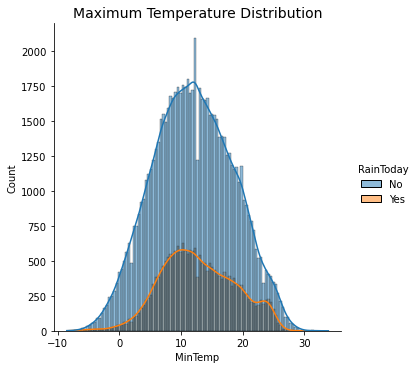

In [108]:
sns.displot(weather, x="MinTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

In [109]:
weather_df = weather.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
weather_df = weather_df.reset_index()
weather_df.head(10)

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,9.996327,15.522039
1,Albany,12.469527,18.461238
2,Albury,8.201681,14.408497
3,AliceSprings,14.656442,18.018405
4,BadgerysCreek,8.095541,14.005390
5,Ballarat,19.844958,22.701225
6,Bendigo,12.965403,17.237915
7,Brisbane,6.990917,10.958220
8,Cairns,15.966683,21.946692
9,Canberra,10.337651,18.960301


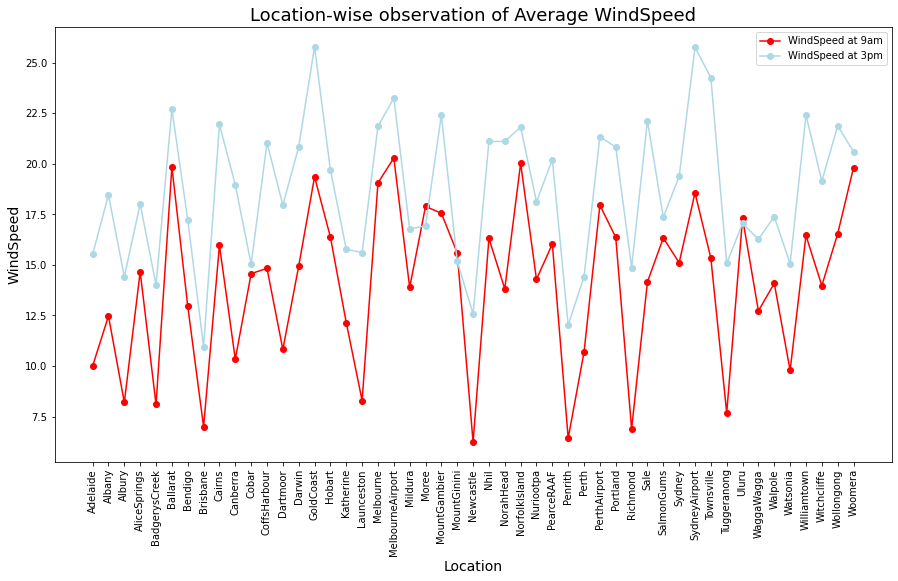

In [110]:
x = weather_df.loc[ :,'Location']
y1 = weather_df['WindSpeed9am'] 
y2 = weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'red', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='o', color = 'lightblue', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=90)
plt.show()

In [111]:
weather.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.600000,5.46132,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,No,0
1,Albury,7.4,25.1,0.000000,5.46132,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,0
2,Albury,17.5,32.3,1.000000,5.46132,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
3,Albury,14.6,29.7,0.200000,5.46132,0.0,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,0
4,Albury,7.7,26.7,0.000000,5.46132,0.0,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,0
5,Albury,13.1,30.1,1.400000,5.46132,0.0,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,4.447985,4.519122,20.1,28.2,Yes,0
6,Albury,13.4,30.4,0.000000,5.46132,0.0,N,30.0,SSE,ESE,...,48.0,22.0,1011.8,1008.7,4.447985,4.519122,20.4,28.8,No,1
7,Albury,15.9,21.7,2.200000,5.46132,0.0,NNE,31.0,NE,ENE,...,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0,Yes,1
8,Albury,12.6,21.0,3.600000,5.46132,0.0,SW,44.0,W,SSW,...,65.0,43.0,1001.2,1001.8,4.447985,7.000000,15.8,19.8,Yes,0
9,Albury,9.8,27.7,2.353024,5.46132,0.0,WNW,50.0,N,WNW,...,50.0,28.0,1013.4,1010.3,0.000000,4.519122,17.3,26.2,No,0


In [112]:
weather_df= weather.groupby(['Location'])[['MinTemp', 'MaxTemp']].mean()
weather_df= weather_df.reset_index()
weather_df.head(10)

,Location,MinTemp,MaxTemp
0,Adelaide,12.525150,22.781468
1,Albany,12.887445,20.036660
2,Albury,9.502057,22.529607
3,AliceSprings,13.219149,29.295517
4,BadgerysCreek,11.137181,23.961459
5,Ballarat,7.287171,18.236625
6,Bendigo,8.524550,21.430435
7,Brisbane,16.369268,26.406074
8,Cairns,21.176868,29.532889
9,Canberra,6.793179,21.000676


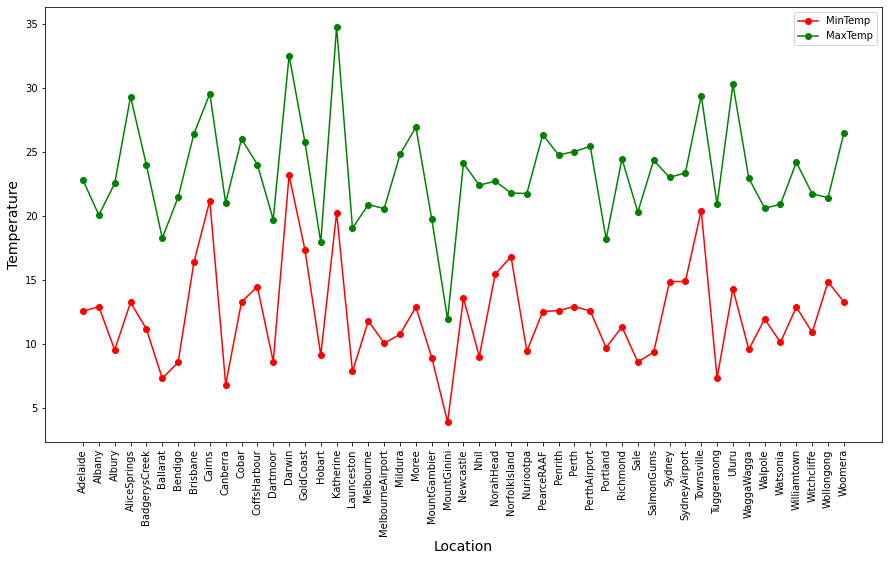

In [113]:
x= weather_df.loc[:,'Location']
y1= weather_df['MinTemp']
y2= weather_df['MaxTemp']
plt.figure(figsize = (15, 8))
plt.plot(x, y1, marker='o' ,color='red', label='MinTemp')
plt.plot(x, y2, marker= 'o', color='green', label= 'MaxTemp')
plt.xlabel('Location',fontsize= 14)
plt.ylabel('Temperature',fontsize= 14)
plt.xticks(rotation=90)
plt.legend()
plt.show()



In [115]:
weather.loc[weather.RainToday == "Yes", "RainToday"] = 1
weather.loc[weather.RainToday == "No", "RainToday"] = 0
weather['RainToday'] = weather['RainToday'].astype(int)


num_weather_df = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
num_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,0.0,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [117]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_original_hot = pd.get_dummies(weather[column_names])
one_original_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [118]:
final_df = pd.concat([num_weather_df, one_original_hot], axis=1)
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,0.0,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.46132,0.0,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,17.5,32.3,1.0,5.46132,0.0,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
3,14.6,29.7,0.2,5.46132,0.0,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
4,7.7,26.7,0.0,5.46132,0.0,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
weather_corr = final_df.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734449,0.103347,0.358375,0.138543,0.174879,0.177537,0.172477,-0.235020,0.004329,...,-0.070841,-0.063972,-0.011599,0.056401,0.023793,-0.035708,-0.046090,-0.078744,-0.046073,-0.059135
MaxTemp,0.734449,1.000000,-0.073583,0.447584,0.253136,0.069864,0.018658,0.050845,-0.501493,-0.500325,...,-0.009106,-0.007303,-0.057861,0.006588,-0.012940,-0.062098,-0.055131,-0.070555,-0.026208,-0.059769
Rainfall,0.103347,-0.073583,1.000000,-0.039140,-0.097400,0.127677,0.086847,0.059762,0.219696,0.248604,...,-0.019310,-0.005525,0.019872,0.010470,0.013388,0.025189,0.011413,0.016227,0.009919,0.012508
Evaporation,0.358375,0.447584,-0.039140,1.000000,0.122609,0.150608,0.142672,0.093384,-0.380420,-0.291679,...,-0.029717,-0.018793,-0.010011,0.013631,0.017389,-0.007608,0.001833,-0.025697,-0.024420,-0.009999
Sunshine,0.138543,0.253136,-0.097400,0.122609,1.000000,0.034284,0.100474,0.105487,-0.291362,-0.306014,...,-0.026716,-0.041641,-0.004798,-0.057131,-0.030505,0.016435,0.053375,-0.007719,-0.022842,0.034023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035708,-0.062098,0.025189,-0.007608,0.016435,-0.006217,0.011996,-0.008186,0.027116,0.027926,...,-0.058569,-0.061256,-0.065211,-0.081693,-0.063798,1.000000,-0.064144,-0.066484,-0.062056,-0.065143
WindDir3pm_SW,-0.046090,-0.055131,0.011413,0.001833,0.053375,0.007115,-0.002014,0.007360,-0.004957,-0.007709,...,-0.063293,-0.066197,-0.070471,-0.088281,-0.068943,-0.064144,1.000000,-0.071846,-0.067061,-0.070397
WindDir3pm_W,-0.078744,-0.070555,0.016227,-0.025697,-0.007719,0.087990,0.028144,0.060111,0.002357,-0.018787,...,-0.065601,-0.068611,-0.073041,-0.091501,-0.071458,-0.066484,-0.071846,1.000000,-0.069507,-0.072965
WindDir3pm_WNW,-0.046073,-0.026208,0.009919,-0.024420,-0.022842,0.084901,0.015688,0.057372,-0.002095,-0.034151,...,-0.061232,-0.064042,-0.068176,-0.085407,-0.066699,-0.062056,-0.067061,-0.069507,1.000000,-0.068105


In [120]:
cor_target = abs(weather_corr["RainTomorrow"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

Rainfall         0.236476
WindGustSpeed    0.225439
Humidity9am      0.254008
Humidity3pm      0.438649
Pressure9am      0.235220
Pressure3pm      0.215813
Cloud9am         0.252877
Cloud3pm         0.297873
RainToday        0.304991
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [121]:
final_weather_train_data = final_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
final_weather_train_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,0.0,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,0.0,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,0.0,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,0.0,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,0.0,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


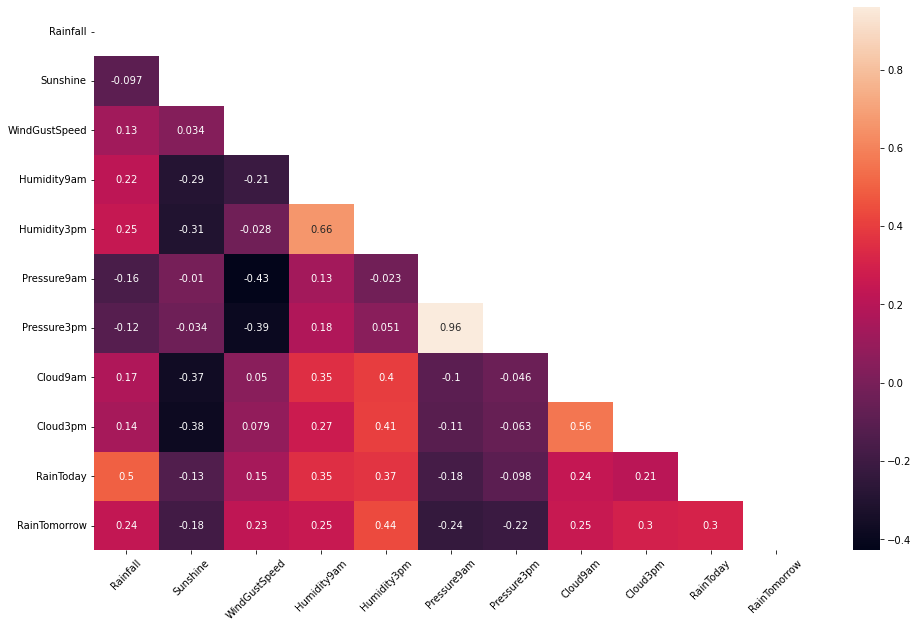

In [122]:
final_train_corr = final_weather_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

# LogisticRegression

In [123]:
X = final_weather_train_data.drop(['RainTomorrow'], axis=1)
y = final_weather_train_data['RainTomorrow']

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(79612, 10) (19904, 10) (79612,) (19904,)


In [126]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [127]:
log_reg_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 84.09%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

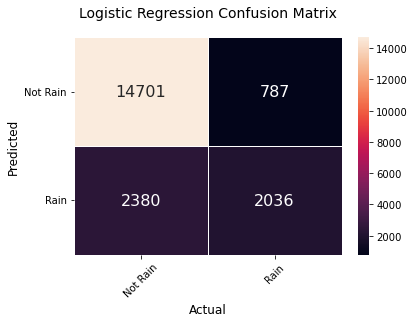

In [129]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [130]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.95      0.90     15488
        Rain       0.72      0.46      0.56      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.71      0.73     19904
weighted avg       0.83      0.84      0.83     19904



# KNN Model

In [131]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [132]:
knn_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The classification accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

The classification accuracy of KNN model is 82.78%


Text(0.5, 1.0, 'KNN Confusion Matrix')

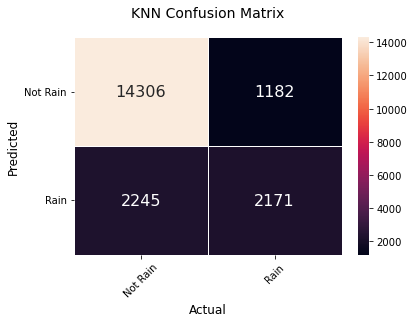

In [134]:
y_pred = knn_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [135]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

KNN Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.92      0.89     15488
        Rain       0.65      0.49      0.56      4416

    accuracy                           0.83     19904
   macro avg       0.76      0.71      0.73     19904
weighted avg       0.82      0.83      0.82     19904



# Decision Tree Classification Model

In [136]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
dtree_model.predict(X_val)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [138]:
dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The classification accuracy of Decision Tree model is 77.68%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

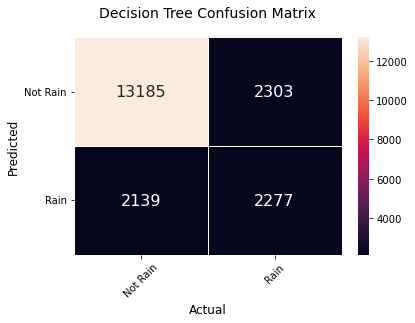

In [139]:
y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)

In [140]:
print('Decision Tree Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Decision Tree Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.85      0.86     15488
        Rain       0.50      0.52      0.51      4416

    accuracy                           0.78     19904
   macro avg       0.68      0.68      0.68     19904
weighted avg       0.78      0.78      0.78     19904



# AdaBoost Classification Model

In [141]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier()

In [142]:
adaboost_model.predict(X_val)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [143]:
adaboost_model_score = adaboost_model.score(X_val, y_val)
adaboost_model_accuracy = round(adaboost_model_score*100, 2)
print("The classification accuracy of AdaBoost model is "+ str(adaboost_model_accuracy)+"%")

The classification accuracy of AdaBoost model is 84.23%


Text(0.5, 1.0, 'AdaBoost Confusion Matrix')

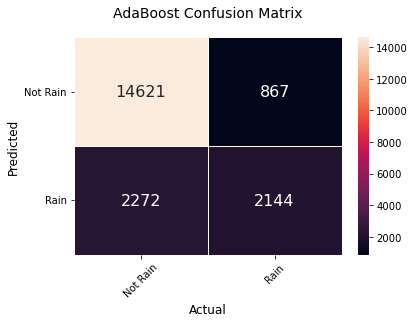

In [144]:
y_pred = adaboost_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('AdaBoost Confusion Matrix', fontsize=14, pad=20)

In [145]:
print('AdaBoost Classification Report')
print('==============================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

AdaBoost Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.94      0.90     15488
        Rain       0.71      0.49      0.58      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.71      0.74     19904
weighted avg       0.83      0.84      0.83     19904



# Random Forest Classification Model

In [146]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
rforest_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [148]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 84.77%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

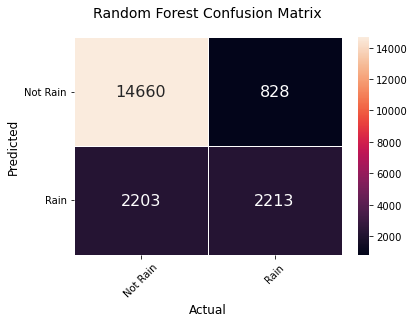

In [149]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [150]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15488
        Rain       0.73      0.50      0.59      4416

    accuracy                           0.85     19904
   macro avg       0.80      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904



In [152]:
accuracy_dict = {'Logistic Regrssion' : log_reg_model_accuracy,
                 'K-Nearest Neighbors' : knn_model_accuracy,
                 'Decision Tree' : dtree_model_accuracy,
                 'AdaBoost' : adaboost_model_accuracy,
                 'Random Forest' : rforest_model_accuracy}
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Logistic Regrssion = 84.09 %
K-Nearest Neighbors = 82.78 %
Decision Tree = 77.68 %
AdaBoost = 84.23 %
Random Forest = 84.77 %
